### 21BAI1423 // CHALLA ANUDEEP REDDY

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


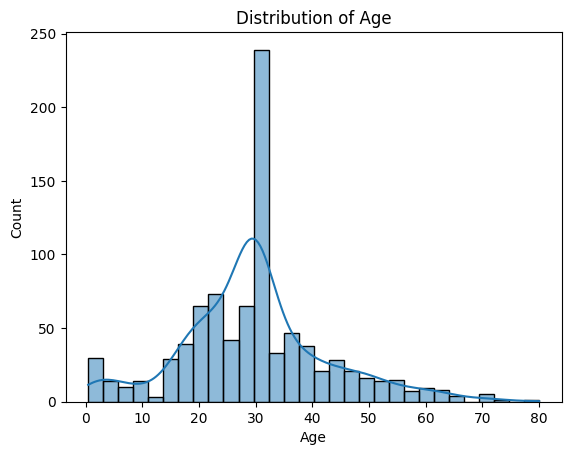

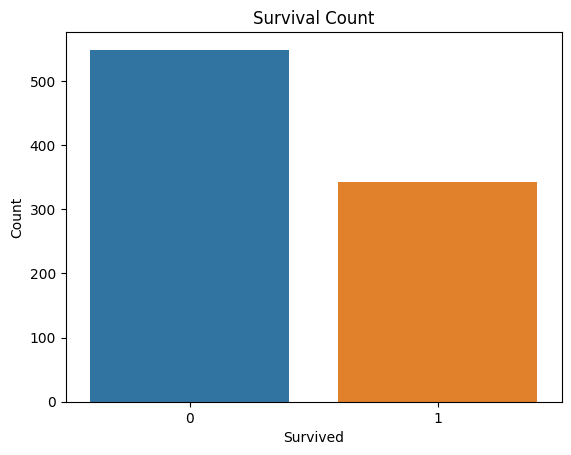

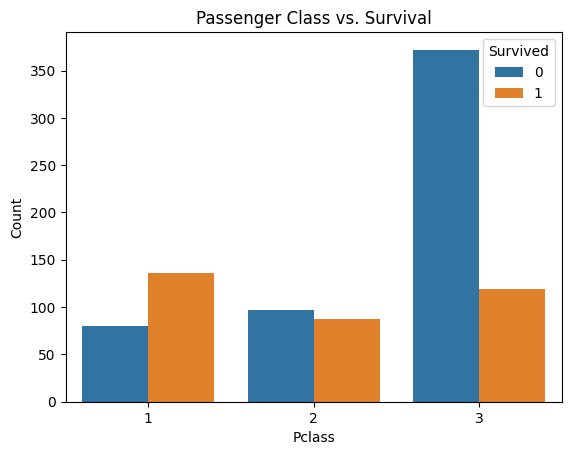

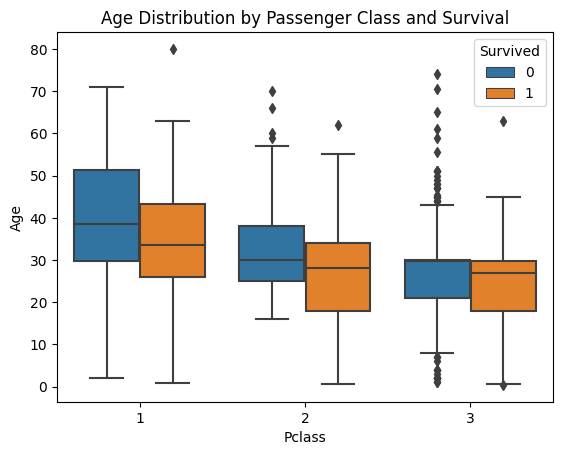

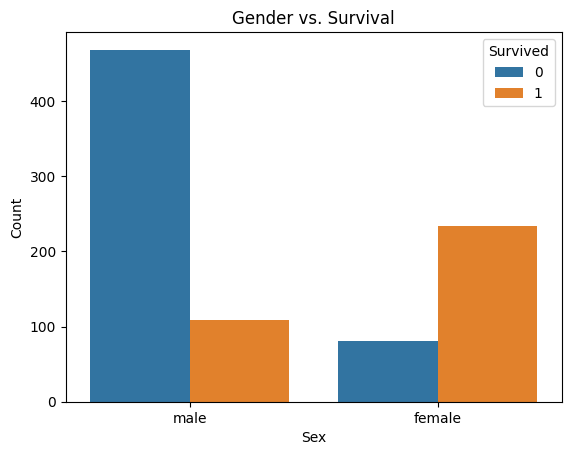

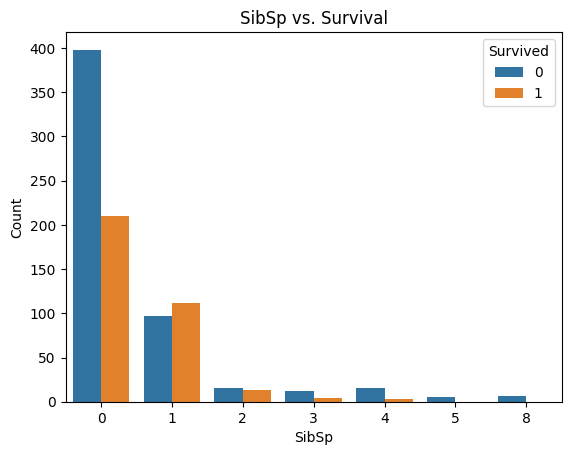

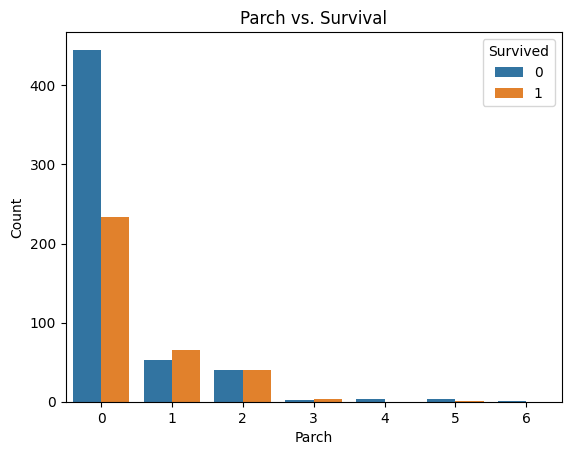

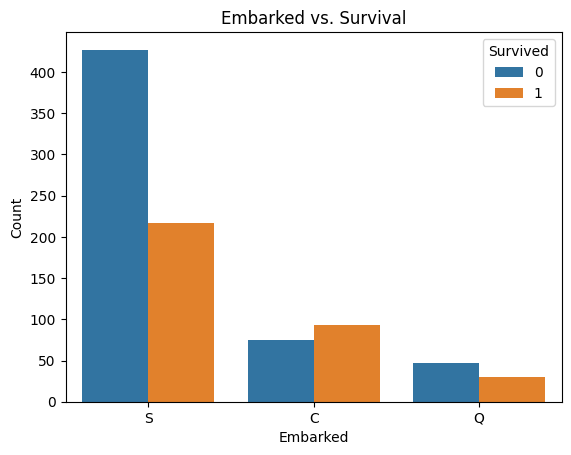

<ipython-input-7-3b87c7dcca39>:79: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = titanic_data.quantile(0.25)
<ipython-input-7-3b87c7dcca39>:80: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = titanic_data.quantile(0.75)
<ipython-input-7-3b87c7dcca39>:87: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_indices = ((titanic_data < (Q1 - threshold * IQR)) | (titanic_data > (Q3 + threshold * IQR))).any(axis=1)


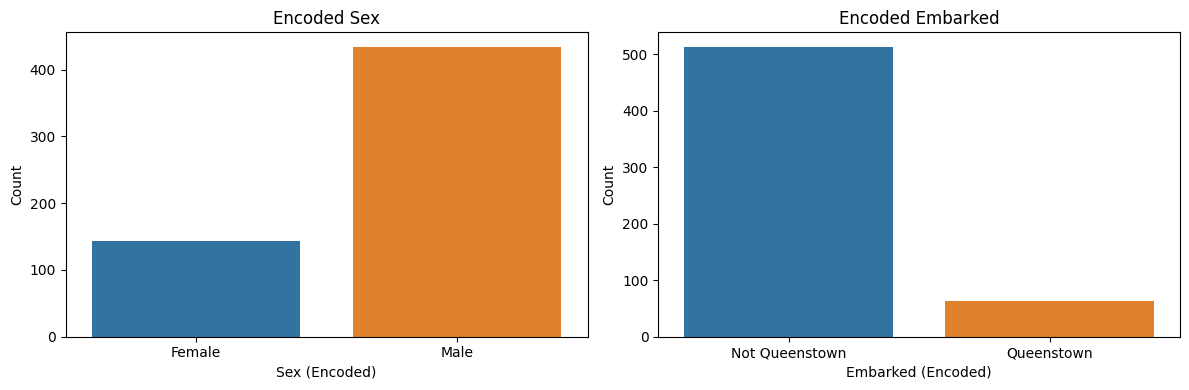

In [7]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing the dataset (assuming the dataset is in your working directory)
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

# Checking for Null Values
print(titanic_data.isnull().sum())

# Replace null values in the 'Age' column with the mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Checking for Null Values after replacing
print(titanic_data.isnull().sum())

# Data Visualization
# Distribution of the 'Age' column
sns.histplot(titanic_data['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Countplot for Survived
sns.countplot(data=titanic_data, x='Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

# Countplot for Pclass (Passenger Class)
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Class vs. Survival')
plt.show()

# Boxplot for Age
sns.boxplot(data=titanic_data, x='Pclass', y='Age', hue='Survived')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

# Countplot for Sex
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender vs. Survival')
plt.show()

# Countplot for SibSp (Number of Siblings/Spouses)
sns.countplot(data=titanic_data, x='SibSp', hue='Survived')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('SibSp vs. Survival')
plt.show()

# Countplot for Parch (Number of Parents/Children)
sns.countplot(data=titanic_data, x='Parch', hue='Survived')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Parch vs. Survival')
plt.show()

# Countplot for Embarked (Port of Embarkation)
sns.countplot(data=titanic_data, x='Embarked', hue='Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked vs. Survival')
plt.show()

# Outlier Detection using IQR
Q1 = titanic_data.quantile(0.25)
Q3 = titanic_data.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Find the indices of outliers
outlier_indices = ((titanic_data < (Q1 - threshold * IQR)) | (titanic_data > (Q3 + threshold * IQR))).any(axis=1)

# Remove outliers from the dataset
titanic_data_no_outliers = titanic_data[~outlier_indices]

# Splitting Dependent and Independent Variables
X = titanic_data_no_outliers.drop('Survived', axis=1)  # Independent variables
y = titanic_data_no_outliers['Survived']  # Dependent variable

# Perform Encoding (Convert categorical variables to numerical)
X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Calculate value counts for the 'Sex' column after one-hot encoding
sex_encoded_counts = X_encoded['Sex_male'].value_counts()

# Calculate value counts for the 'Embarked' column after one-hot encoding
embarked_encoded_counts = X_encoded['Embarked_Q'].value_counts()

# Plot the value counts
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=sex_encoded_counts.index, y=sex_encoded_counts.values)
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Sex (Encoded)')
plt.ylabel('Count')
plt.title('Encoded Sex')

plt.subplot(1, 2, 2)
sns.barplot(x=embarked_encoded_counts.index, y=embarked_encoded_counts.values)
plt.xticks([0, 1], ['Not Queenstown', 'Queenstown'])
plt.xlabel('Embarked (Encoded)')
plt.ylabel('Count')
plt.title('Encoded Embarked')

plt.tight_layout()
plt.show()

# Feature Scaling
# Select only the numeric columns for feature scaling
numeric_cols = X_encoded.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_cols)

# Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




In [8]:
# Checking the shapes of train and test data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Display a sample of the train and test data
print("Sample of X_train:")
print(X_train[:5])  # Print the first 5 rows of X_train

print("Sample of y_train:")
print(y_train[:5])  # Print the first 5 rows of y_train

print("Sample of X_test:")
print(X_test[:5])   # Print the first 5 rows of X_test

print("Sample of y_test:")
print(y_test[:5])   # Print the first 5 rows of y_test


Shape of X_train: (461, 9)
Shape of X_test: (116, 9)
Shape of y_train: (461,)
Shape of y_test: (116,)
Sample of X_train:
[[-1.32870581  0.67832969 -0.20471669 -0.44823494  0.         -0.55817592
   0.57401488 -0.35320863  0.5766832 ]
 [ 1.37041894  0.67832969  0.14782577 -0.44823494  0.         -0.56776658
   0.57401488 -0.35320863  0.5766832 ]
 [-1.35184116 -0.68542024  0.50036824  1.80073514  0.          0.8791682
   0.57401488 -0.35320863  0.5766832 ]
 [ 1.36656305  0.67832969 -0.32223084 -0.44823494  0.         -0.63128086
   0.57401488 -0.35320863  0.5766832 ]
 [-1.3826883   0.67832969 -1.14482992 -0.44823494  0.         -0.56147867
   0.57401488 -0.35320863  0.5766832 ]]
Sample of y_train:
105    0
805    0
99     0
804    1
91     0
Name: Survived, dtype: int64
Sample of X_test:
[[-1.01252262 -2.04917017  1.79302393 -0.44823494  0.          0.92283427
   0.57401488 -0.35320863  0.5766832 ]
 [ 0.62623169  0.67832969 -0.00504632  1.80073514  0.          0.04554322
  -1.7421151   2

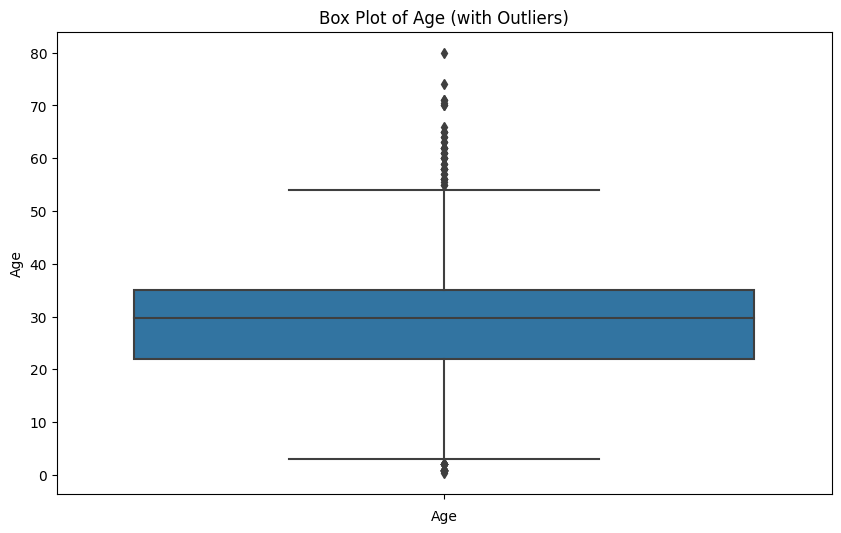

In [9]:
# Create box plots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_data, y='Age')
plt.xlabel('Age')
plt.title('Box Plot of Age (with Outliers)')
plt.show()
